In [1]:
#Importing libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
from scipy.stats import norm
from collections import Counter
import warnings
warnings.filterwarnings(action="ignore")
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn import datasets, metrics, model_selection, svm
import sklearn
import xgboost as xgb
from sklearn import tree
from sklearn.svm import SVC
from sklearn.metrics import roc_curve
from imblearn.pipeline import Pipeline
from catboost import CatBoostClassifier
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import StackingClassifier
from sklearn.metrics import classification_report
from mlxtend.classifier import StackingCVClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold, cross_validate
from sklearn.metrics import recall_score, f1_score, roc_auc_score
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from sklearn.metrics import precision_recall_curve, average_precision_score
from sklearn.model_selection import RepeatedStratifiedKFold, StratifiedKFold
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score
import copy

C:\Users\dkerp\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
#Data upload and indexing


df = pd.read_csv("Taiwan.csv",index_col=False )
df['INDEKSAS']= range(1, len(df)+1 ,1)
# print(len(df))
# print(len(range(1, len(df)+1 ,1)))
df.set_index('INDEKSAS')

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
INDEKSAS,,,,,,,,,,,,,,,,,,,,,
1,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
2,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
3,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
4,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
5,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6815,0,0.493687,0.539468,0.543230,0.604455,0.604462,0.998992,0.797409,0.809331,0.303510,...,0.799927,0.000466,0.623620,0.604455,0.840359,0.279606,0.027064,0.566193,1,0.029890
6816,0,0.475162,0.538269,0.524172,0.598308,0.598308,0.998992,0.797414,0.809327,0.303520,...,0.799748,0.001959,0.623931,0.598306,0.840306,0.278132,0.027009,0.566018,1,0.038284
6817,0,0.472725,0.533744,0.520638,0.610444,0.610213,0.998984,0.797401,0.809317,0.303512,...,0.797778,0.002840,0.624156,0.610441,0.840138,0.275789,0.026791,0.565158,1,0.097649


0    6599
1     220
Name: Bankrupt?, dtype: int64
--------------------------------------------------
Nebankrutavusiu įmonių dalis:  96.77 %
Bankrutavusiu įmonių dalis:  3.23 %


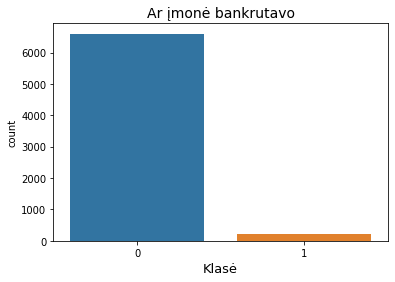

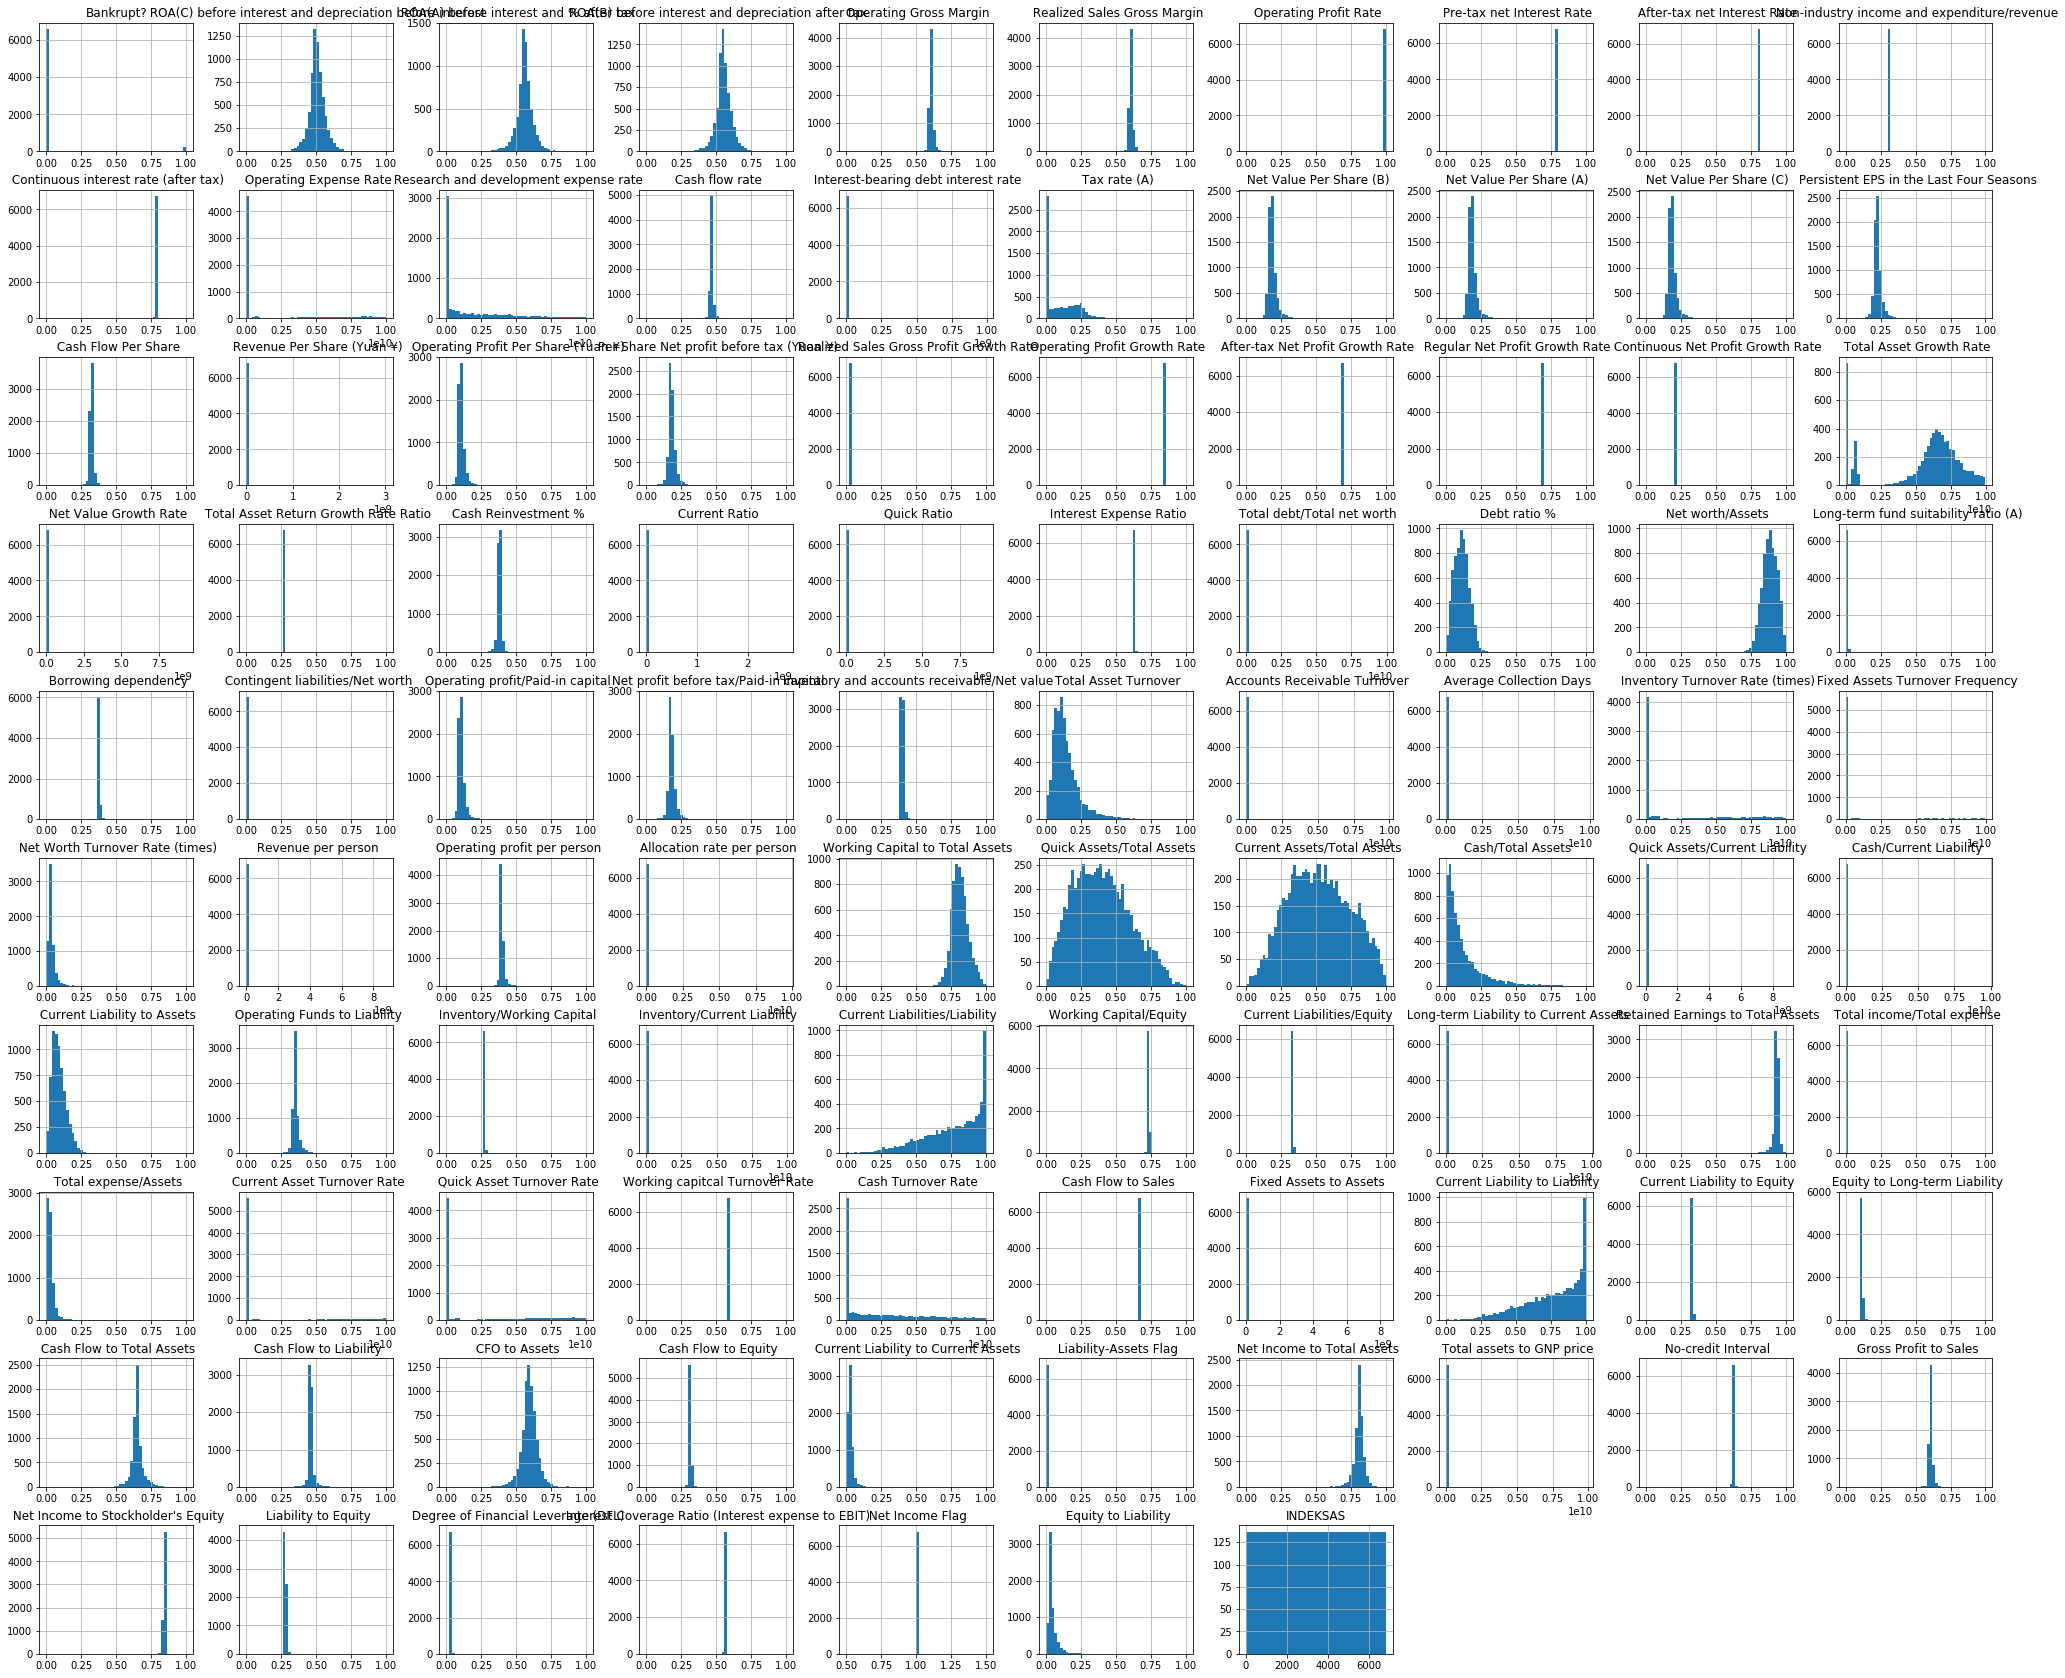

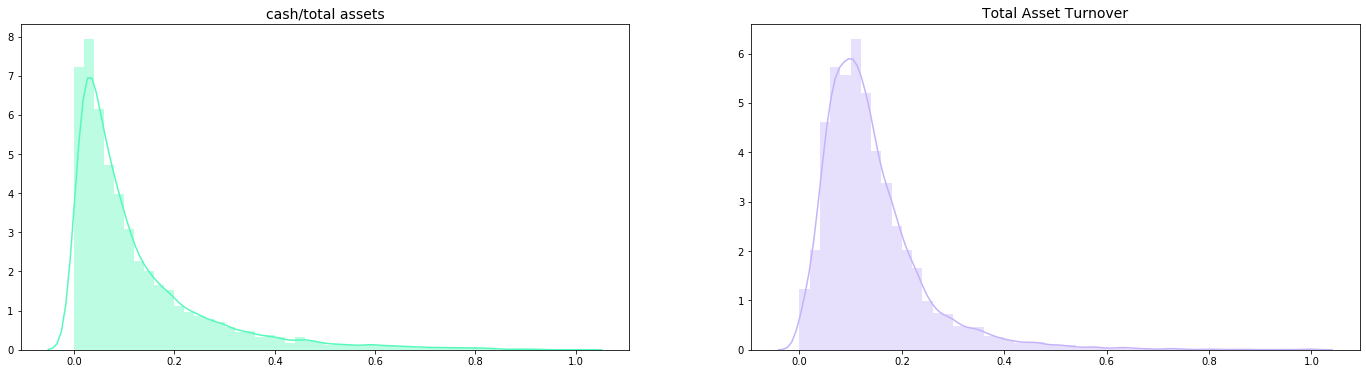

In [3]:
#Data analysis


print(df['Bankrupt?'].value_counts())
print('-'* 50)
print('Nebankrutavusiu įmonių dalis: ', round(df['Bankrupt?'].value_counts()[0]/len(df) * 100,2), '%')
print('Bankrutavusiu įmonių dalis: ', round(df['Bankrupt?'].value_counts()[1]/len(df) * 100,2), '%')
sns.countplot(df['Bankrupt?'])
plt.title('Ar įmonė bankrutavo', fontsize=14)
plt.xlabel('Klasė', fontsize=13)
plt.show()


df.hist(figsize = (35,30), bins = 50)
plt.show()


f, (ax1, ax2) = plt.subplots(1,2, figsize=(24, 6))
cash_tot_assets = df[' Cash/Total Assets'].values
sns.distplot(cash_tot_assets ,ax=ax1, color='#56F9BB')
ax1.set_title('cash/total assets', fontsize=14)
tot_assets_turnover = df[' Total Asset Turnover'].values
sns.distplot(tot_assets_turnover ,ax=ax2, color='#C5B3F9')
ax2.set_title('Total Asset Turnover', fontsize=14)
plt.show()

In [4]:
#Data processing


new_df=df
labels = new_df['Bankrupt?']
new_df = new_df.drop(['Bankrupt?'],axis=1)
indices = new_df.index.values
X_raw,X_test,ind_raw,ind_test = train_test_split(new_df,
 indices,
 test_size=0.25,
 stratify = labels,
 random_state = 42)
y_raw, y_test = labels[ind_raw], labels[ind_test]


print('Treniravimo duomenys')
print(y_raw.value_counts())
print('-'* 50)

print('Nebankrutavusiu įmonių dalis: ', round(df['Bankrupt?'].value_counts()[0]/len(df) * 100,2), '%')
print('Bankrutavusiu įmonių dalis: ', round(df['Bankrupt?'].value_counts()[1]/len(df) * 100,2), '%')

print('Testavimo duomenys')
print(y_test.value_counts())
print('-'* 50)

print('Nebankrutavusiu įmonių dalis: ', round(df['Bankrupt?'].value_counts()[0]/len(df) * 100,2), '%')
print('Bankrutavusiu įmonių dalis: ', round(df['Bankrupt?'].value_counts()[1]/len(df) * 100,2), '%')
print('''Požymio "Cash/Total Assets" asimetrijos koeficientas: ''', X_raw[' Cash/Total Assets'].skew())
print('''Požymio "Total Asset Turnover" asimetrijos koeficientas: ''', X_raw[' Total Asset Turnover'].skew())
def log_trans(data):

    for col in data:
        skew = data[col].skew()
        
        if skew > 0.5 or skew < -0.5:
            data[col] = np.log1p(data[col])
        else:
            continue
    return data

X_raw = log_trans(X_raw)
X_test = log_trans(X_test)

print('''Požymio "Cash/Total Assets" asimetrijos koeficientas: ''', X_raw[' Cash/Total Assets'].skew())
print('''Požymio "Total Asset Turnover" asimetrijos koeficientas: ''', X_raw[' Total Asset Turnover'].skew())

Treniravimo duomenys
0    4949
1     165
Name: Bankrupt?, dtype: int64
--------------------------------------------------
Nebankrutavusiu įmonių dalis:  96.77 %
Bankrutavusiu įmonių dalis:  3.23 %
Testavimo duomenys
0    1650
1      55
Name: Bankrupt?, dtype: int64
--------------------------------------------------
Nebankrutavusiu įmonių dalis:  96.77 %
Bankrutavusiu įmonių dalis:  3.23 %
Požymio "Cash/Total Assets" asimetrijos koeficientas:  2.2377347637193687
Požymio "Total Asset Turnover" asimetrijos koeficientas:  2.233717413069088
Požymio "Cash/Total Assets" asimetrijos koeficientas:  1.8186269382807982
Požymio "Total Asset Turnover" asimetrijos koeficientas:  1.690215220405487


In [5]:
#Logistic Regression


log_reg_sm = LogisticRegression()
#log_reg_params = {}
log_reg_params = {"penalty": ['l2'],
 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
 'class_weight': ['balanced',None],
 'solver':['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}

In [6]:
#'Randomized' search for optimal C


rand_log_reg = GridSearchCV(LogisticRegression(), log_reg_params, n_jobs = -1)

In [7]:
#Inflating "bankrupt" object count wyth synthetic Data

accuracy_lst_reg = []
precision_lst_reg = []
recall_lst_reg = []
f1_lst_reg = []
auc_lst_reg = []


pipeline_reg = imbalanced_make_pipeline(SMOTE(sampling_strategy='minority'), rand_log_reg) # SMOTE
model_reg = pipeline_reg.fit(X_raw, y_raw)
best_est_reg = rand_log_reg.best_estimator_
prediction_reg = best_est_reg.predict(X_raw)

accuracy_lst_reg.append(pipeline_reg.score(X_raw, y_raw))
precision_lst_reg.append(precision_score(y_raw, prediction_reg))
recall_lst_reg.append(recall_score(y_raw, prediction_reg))
f1_lst_reg.append(f1_score(y_raw, prediction_reg))
auc_lst_reg.append(roc_auc_score(y_raw, prediction_reg))

In [8]:
#Random Forest

accuracy_lst_rfc = []
precision_lst_rfc = []
recall_lst_rfc = []
f1_lst_rfc = []
auc_lst_rfc = []

rfc_sm = RandomForestClassifier()
rfc_params = {'max_features' : ['auto', 'sqrt', 'log2'],
 'random_state' : [42],
 'criterion' : ['gini', 'entropy'],
 'bootstrap' : [True],
 'n_jobs' : [-1]}


rand_rfc = GridSearchCV(rfc_sm, rfc_params)
pipeline_rfc = imbalanced_make_pipeline(SMOTE(sampling_strategy='minority'), rand_rfc)
model_rfc = pipeline_rfc.fit(X_raw, y_raw)
best_est_rfc = rand_log_reg.best_estimator_
prediction_rfc = best_est_rfc.predict(X_raw)

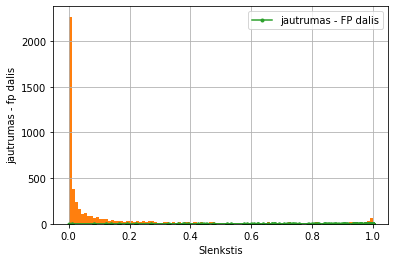

0.37449413264212134
0.8124996173086697


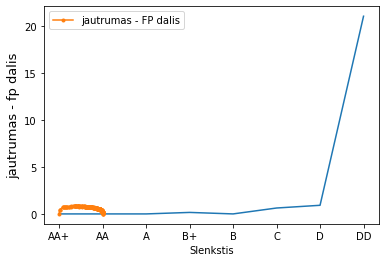

0.37449413264212134
0.8124996173086697


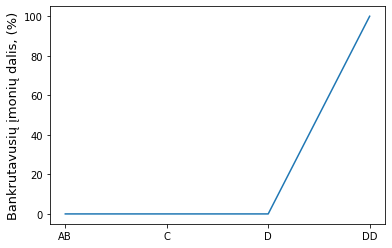

In [9]:
#Constructing Rating Systems


prob_1 = best_est_reg.predict_proba(X_raw)
pred_1 = best_est_reg.predict(X_raw)
Xy_raw = copy.deepcopy(X_raw)
Xy_raw['Tikimybe']=prob_1[:,1]
Xy_raw['Bankrotas']=y_raw
prob_2 = best_est_rfc.predict_proba(X_raw)
Xy_rfc = copy.deepcopy(X_raw )
Xy_rfc['Tikimybe']=prob_2[:,1]
Xy_rfc['Bankrotas']=y_raw
Xy_raw['Tikimybe'].hist(bins=100)
Xy_rfc['Tikimybe'].hist(bins=100)
Xy_raw = Xy_raw.sort_values(by=['Tikimybe'])

aa = Xy_raw[0:639]
bb = Xy_raw[639:639*2]
cc = Xy_raw[639*2:639*3]
dd = Xy_raw[639*3:639*4]
ee = Xy_raw[639*4:639*5]
ff = Xy_raw[639*5:639*6]
gg = Xy_raw[639*6:639*7]
hh = Xy_raw[639*7:]

aa['Tikimybe'].max()
bb['Tikimybe'].max()
cc['Tikimybe'].max()
dd['Tikimybe'].max()
ee['Tikimybe'].max()
ff['Tikimybe'].max()
gg['Tikimybe'].max()
hh['Tikimybe'].max()

yhat = best_est_reg.predict_proba(X_raw)
yhat = yhat[:, 1]
fpr, tpr, thresholds = roc_curve(y_raw, yhat)
thresholds= np.delete(thresholds,0)
fpr= np.delete(fpr,0)
tpr= np.delete(tpr,0)
plt.plot(thresholds, tpr-fpr, marker='.', label='jautrumas - FP dalis')
plt.xlabel('Slenkstis')
plt.ylabel('jautrumas - fp dalis')
plt.legend()
plt.show()

skirtumas = tpr-fpr
max_y111 = max(skirtumas) # Find the maximum y value
max_x111 = thresholds[skirtumas.argmax()] # Find the x value corresponding to the maximum y value
print (max_x111)
print (max_y111)

Xy_raw_lik, aa = [x for _, x in Xy_raw.groupby(Xy_raw['Tikimybe'] < 0.0000363)]
Xy_raw_lik, bb = [x for _, x in Xy_raw_lik.groupby(Xy_raw_lik['Tikimybe'] < 0.0007813)]
Xy_raw_lik, cc = [x for _, x in Xy_raw_lik.groupby(Xy_raw_lik['Tikimybe'] < 0.0040778)]
Xy_raw_lik, dd = [x for _, x in Xy_raw_lik.groupby(Xy_raw_lik['Tikimybe'] < 0.0145475)]
Xy_raw_lik, ee = [x for _, x in Xy_raw_lik.groupby(Xy_raw_lik['Tikimybe'] < 0.0472854)]
Xy_raw_lik, ff = [x for _, x in Xy_raw_lik.groupby(Xy_raw_lik['Tikimybe'] < 0.1439055)]
hh, gg = [x for _, x in Xy_raw_lik.groupby(Xy_raw_lik['Tikimybe'] < 0.397563)]

aa.groupby(by='Bankrotas').agg('count')
bb.groupby(by='Bankrotas').agg('count')
cc.groupby(by='Bankrotas').agg('count')
dd.groupby(by='Bankrotas').agg('count')
ee.groupby(by='Bankrotas').agg('count')
ff.groupby(by='Bankrotas').agg('count')
gg.groupby(by='Bankrotas').agg('count')
hh.groupby(by='Bankrotas').agg('count')

reitingai = ['AA+','AA','A','B+','B','C','D','DD']
Procentai = [0,0,0,0.16,0,0.63,0.92,21.09]
plt.ylabel('Bankrutavusių įmonių dalis, (%)', fontsize=13)
plt.plot(reitingai,Procentai)
Xy_rfc= Xy_rfc.sort_values(by=['Tikimybe'])
aar = Xy_rfc[0:3007]
ffr = Xy_rfc[3007:3007+702]
ggr = Xy_rfc[3007+702:3007+702*2]
hhr = Xy_rfc[3007+702*2:]
aa['Tikimybe'].max()
ffr['Tikimybe'].max()
ggr['Tikimybe'].max()
hhr['Tikimybe'].max()
yhat_tr = best_est_rfc.predict_proba(X_raw)
yhat_tr = yhat_tr [:, 1]
fpr_tr_r, tpr_tr, thresholds_tr = roc_curve(y_raw, yhat_tr)
thresholds_tr= np.delete(thresholds_tr,0)
fpr_tr_r= np.delete(fpr_tr_r,0)
tpr_tr= np.delete(tpr_tr,0)
plt.plot(thresholds_tr, tpr_tr-fpr_tr_r, marker='.', label='jautrumas - FP dalis')
plt.xlabel('Slenkstis')
plt.ylabel('jautrumas - fp dalis')
plt.legend()
plt.show()
skirtumas_tr = tpr_tr-fpr_tr_r
max_y111 = max(skirtumas_tr) # Find the maximum y value
max_x111 = thresholds_tr[skirtumas_tr.argmax()] # Find the x value corresponding to the maximum y value
print (max_x111)
print (max_y111)
Xy_rfc_lik, aar = [x for _, x in Xy_rfc.groupby(Xy_rfc['Tikimybe'] <0.01)]
Xy_rfc_lik, ffr = [x for _, x in Xy_rfc_lik.groupby(Xy_rfc_lik['Tikimybe'] < 0.03)]
hhr, ggr = [x for _, x in Xy_rfc_lik.groupby(Xy_rfc_lik['Tikimybe'] < 0.65)]
aar.groupby(by='Bankrotas').agg('count')
ffr.groupby(by='Bankrotas').agg('count')
ggr.groupby(by='Bankrotas').agg('count')
hhr.groupby(by='Bankrotas').agg('count')
reitingai = ['AB','C','D','DD']
Procentai = [0,0,0,100]
plt.ylabel('Bankrutavusių įmonių dalis, (%)', fontsize=13)
plt.plot(reitingai,Procentai)

<function matplotlib.pyplot.show(*args, **kw)>

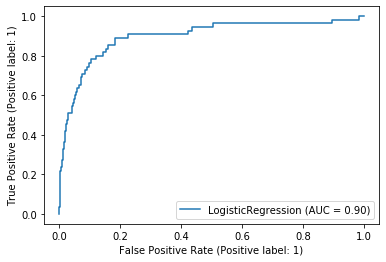

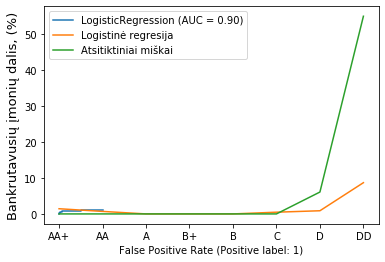

In [10]:
#Using model on Test Data


metrics.plot_roc_curve(best_est_reg, X_test, y_test)
metrics.plot_roc_curve(best_est_rfc, X_test, y_test)
prob_1_test = best_est_reg.predict_proba(X_test)
pred_1_test = best_est_reg.predict(X_test)
Xy_raw_test = copy.deepcopy(X_test)
Xy_raw_test['Tikimybe']=prob_1_test[:,1]
Xy_raw_test ['Bankrotas']=y_test
prob_2_test = best_est_rfc.predict_proba(X_test)
Xy_rfc_test = copy.deepcopy(X_test)
Xy_rfc_test ['Tikimybe']=prob_2_test[:,1]
Xy_rfc_test ['Bankrotas']=y_test

Xy_raw_lik, aa_test = [x for _, x in Xy_raw_test.groupby(Xy_raw_test['Tikimybe'] < 0.0000363)]
Xy_raw_lik, bb_test = [x for _, x in Xy_raw_lik.groupby(Xy_raw_lik['Tikimybe'] < 0.0007813)]
Xy_raw_lik, cc_test = [x for _, x in Xy_raw_lik.groupby(Xy_raw_lik['Tikimybe'] < 0.0040778)]
Xy_raw_lik, dd_test = [x for _, x in Xy_raw_lik.groupby(Xy_raw_lik['Tikimybe'] < 0.0145475)]
Xy_raw_lik, ee_test = [x for _, x in Xy_raw_lik.groupby(Xy_raw_lik['Tikimybe'] < 0.0472854)]
Xy_raw_lik, ff_test = [x for _, x in Xy_raw_lik.groupby(Xy_raw_lik['Tikimybe'] < 0.1439055)]
hh_test, gg_test = [x for _, x in Xy_raw_lik.groupby(Xy_raw_lik['Tikimybe'] < 0.397563)]

aa_test.groupby(by='Bankrotas').agg('count')
bb_test.groupby(by='Bankrotas').agg('count')
cc_test.groupby(by='Bankrotas').agg('count')
dd_test.groupby(by='Bankrotas').agg('count')
ee_test.groupby(by='Bankrotas').agg('count')
ff_test.groupby(by='Bankrotas').agg('count')
gg_test.groupby(by='Bankrotas').agg('count')
hh_test.groupby(by='Bankrotas').agg('count')

Xy_rfc_lik, aar_test = [x for _, x in Xy_rfc_test.groupby(Xy_rfc_test ['Tikimybe'] <0.01)]
Xy_rfc_lik, ffr_test = [x for _, x in Xy_rfc_lik.groupby(Xy_rfc_lik['Tikimybe'] < 0.03)]
hhr_test, ggr_test = [x for _, x in Xy_rfc_lik.groupby(Xy_rfc_lik['Tikimybe'] < 0.65)]

aar_test.groupby(by='Bankrotas').agg('count')
ffr_test.groupby(by='Bankrotas').agg('count')
ggr_test.groupby(by='Bankrotas').agg('count')
hhr_test.groupby(by='Bankrotas').agg('count')

reitingai = ['AA+','AA','A','B+','B','C','D','DD']
Procentai_test1 = [1.44,0.7,0,0,0,0.48,0.88,8.69]
Procentai_test2 = [0,0,0,0,0,0,6.09,55]

plt.ylabel('Bankrutavusių įmonių dalis, (%)', fontsize=13)
plt.plot(reitingai,Procentai_test1,label='Logistinė regresija' )
plt.plot(reitingai,Procentai_test2,label='Atsitiktiniai miškai')
plt.legend()
plt.show 